# Hello World - Deeplearning

This is the Hello World equivalent in deeplearning. <br/>
With this, we are trying to identify Cats from Dogs.

In [1]:
from fastai2.vision.all import *

## Inspecting Images

In [2]:
im_path = untar_data(URLs.PETS)

In [3]:
im_path.ls()

(#2) [Path('/storage/data/oxford-iiit-pet/annotations'),Path('/storage/data/oxford-iiit-pet/images')]

In [4]:
image_list = (im_path/"images").ls()
image_list

(#7393) [Path('/storage/data/oxford-iiit-pet/images/Ragdoll_197.jpg'),Path('/storage/data/oxford-iiit-pet/images/newfoundland_36.jpg'),Path('/storage/data/oxford-iiit-pet/images/boxer_107.jpg'),Path('/storage/data/oxford-iiit-pet/images/scottish_terrier_5.jpg'),Path('/storage/data/oxford-iiit-pet/images/yorkshire_terrier_136.jpg'),Path('/storage/data/oxford-iiit-pet/images/keeshond_21.jpg'),Path('/storage/data/oxford-iiit-pet/images/beagle_188.jpg'),Path('/storage/data/oxford-iiit-pet/images/chihuahua_139.jpg'),Path('/storage/data/oxford-iiit-pet/images/basset_hound_44.jpg'),Path('/storage/data/oxford-iiit-pet/images/Russian_Blue_135.jpg')...]

/storage/data/oxford-iiit-pet/images/Ragdoll_197.jpg


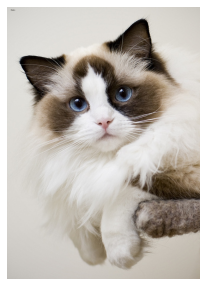

In [5]:
print(image_list[0])
show_image(Image.open(image_list[0]))

/storage/data/oxford-iiit-pet/images/newfoundland_36.jpg


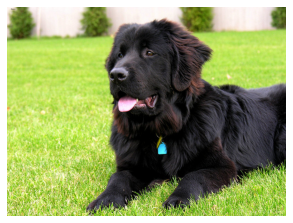

In [6]:
print(image_list[1])
show_image(Image.open(image_list[1]))

In this dataset, dognames starts with a **single letter** while cat names starts with a **capital letter**

## Let's load images

In [7]:
def cat_or_dog(p):
    if p.name[0].isupper():
        return 'cat'
    else:
        return 'dog'

In [8]:
cat_or_dog(image_list[0]), cat_or_dog(image_list[1])

('cat', 'dog')

In [9]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.3),
    item_tfms=Resize(224),
    get_y=cat_or_dog
)

In [10]:
dls = db.dataloaders(im_path/"images")

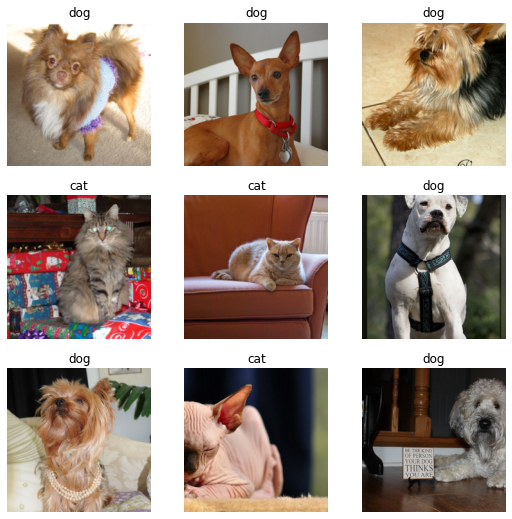

In [11]:
dls.show_batch()

## Let's Train Our Model

In [12]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [13]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.207845,0.022858,0.993685,00:28


epoch,train_loss,valid_loss,accuracy,time
0,0.056686,0.017500,0.993685,00:32
1,0.032552,0.006012,0.997745,00:31


Hmm. This is pretty good. Our accuracy is **99+%** without doing much.

## Now Let's Do Some Predictions

In [14]:
from utils import *

In [15]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [17]:
im_uploaded = PILImage.create(uploader.data[0])

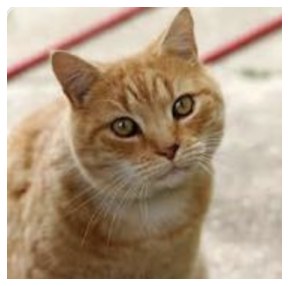

In [18]:
show_image(im_uploaded)

In [19]:
learn.predict(im_uploaded)

('cat', tensor(0), tensor([1.0000e+00, 3.2547e-15]))

In [20]:
uploader

FileUpload(value={'Screenshot 2020-04-29 at 00.04.49.png': {'metadata': {'name': 'Screenshot 2020-04-29 at 00.…

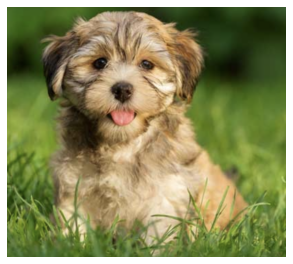

In [21]:
im_uploaded = PILImage.create(uploader.data[0])
show_image(im_uploaded)

In [22]:
learn.predict(im_uploaded)

('dog', tensor(1), tensor([1.6171e-05, 9.9998e-01]))

**That's it.**

## Exporting the Trained Model

So, we can use this model in some other place.

In [23]:
learn.export('cats-and-dogs.pkl')